<a href="https://colab.research.google.com/github/md-kamran98/Credit---Customer-Lead-Prediction/blob/main/Credit_%26_Customer_Lead_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing required Library -->**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.metrics import r2_score,accuracy_score
from sklearn.preprocessing import LabelEncoder
from scipy.stats import zscore,ttest_ind
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.svm import SVC

In [5]:
# Loading the DataSet:
df = pd.read_csv('/content/train data credit card.csv')

**Collecting the Informations from the DataSet:**

In [6]:
df.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0


In [7]:
df.tail()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
245720,BPAWWXZN,Male,51,RG284,Self_Employed,X3,109,NaN,1925586,No,0
245721,HFNB7JY8,Male,27,RG268,Salaried,X1,15,No,862952,Yes,0
245722,GEHAUCWT,Female,26,RG281,Salaried,X1,13,No,670659,No,0
245723,GE7V8SAH,Female,28,RG273,Salaried,X1,31,No,407504,No,0
245724,BOCZSWLJ,Male,29,RG269,Salaried,X1,21,No,1129276,No,0


In [9]:
df.shape

(245725, 11)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245725 entries, 0 to 245724
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ID                   245725 non-null  object
 1   Gender               245725 non-null  object
 2   Age                  245725 non-null  int64 
 3   Region_Code          245725 non-null  object
 4   Occupation           245725 non-null  object
 5   Channel_Code         245725 non-null  object
 6   Vintage              245725 non-null  int64 
 7   Credit_Product       216400 non-null  object
 8   Avg_Account_Balance  245725 non-null  int64 
 9   Is_Active            245725 non-null  object
 10  Is_Lead              245725 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 20.6+ MB


In [10]:
df.columns

Index(['ID', 'Gender', 'Age', 'Region_Code', 'Occupation', 'Channel_Code',
       'Vintage', 'Credit_Product', 'Avg_Account_Balance', 'Is_Active',
       'Is_Lead'],
      dtype='object')

In [11]:
df.describe()

,Age,Vintage,Avg_Account_Balance,Is_Lead
count,245725.000000,245725.000000,2.457250e+05,245725.000000
mean,43.856307,46.959141,1.128403e+06,0.237208
std,14.828672,32.353136,8.529364e+05,0.425372
min,23.000000,7.000000,2.079000e+04,0.000000
25%,30.000000,20.000000,6.043100e+05,0.000000
50%,43.000000,32.000000,8.946010e+05,0.000000
75%,54.000000,73.000000,1.366666e+06,0.000000
max,85.000000,135.000000,1.035201e+07,1.000000


In [12]:
df.nunique()

ID                     245725
Gender                      2
Age                        63
Region_Code                35
Occupation                  4
Channel_Code                4
Vintage                    66
Credit_Product              2
Avg_Account_Balance    135292
Is_Active                   2
Is_Lead                     2
dtype: int64

In [13]:
# Drop the ID columns:
df.drop("ID",axis=1,inplace=True)

In [14]:
df.shape

(245725, 10)

In [15]:
df.isnull().sum()

Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         29325
Avg_Account_Balance        0
Is_Active                  0
Is_Lead                    0
dtype: int64

In [16]:
# Check for duplicates:
df.duplicated().sum()

21

In [17]:
# Dealing with the duplicate values:
df.drop_duplicates(inplace=True)

In [18]:
# Checking for the duplicate again:
df.duplicated().sum()

0

In [19]:
# Replacing the Null-values:
df['Credit_Product'].fillna(0, inplace=True)

In [20]:
df.isnull().sum()

Gender                 0
Age                    0
Region_Code            0
Occupation             0
Channel_Code           0
Vintage                0
Credit_Product         0
Avg_Account_Balance    0
Is_Active              0
Is_Lead                0
dtype: int64

# **Exploratory Data Analysis**

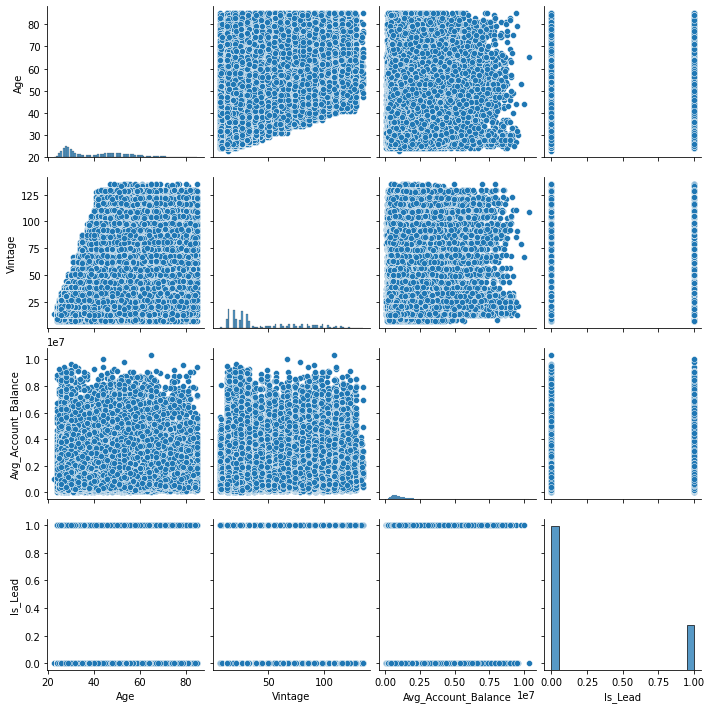

In [21]:
# Looking for the relationship between the Variables in the DataSet:
sns.pairplot(df)

<Axes: >

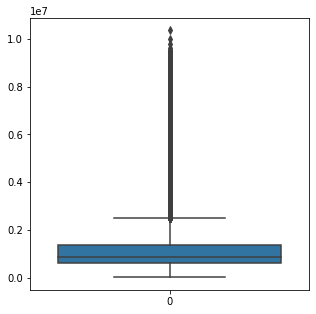

In [22]:
# Looking for Outliers:
plt.figure(figsize=(5,5))
sns.boxplot(df['Avg_Account_Balance'])

**As we can see there are outliers but we can’t remove them because they are considrable
outliers.**

## **Looking for Imbalanced DataSet**

Text(0, 0.5, 'counts')

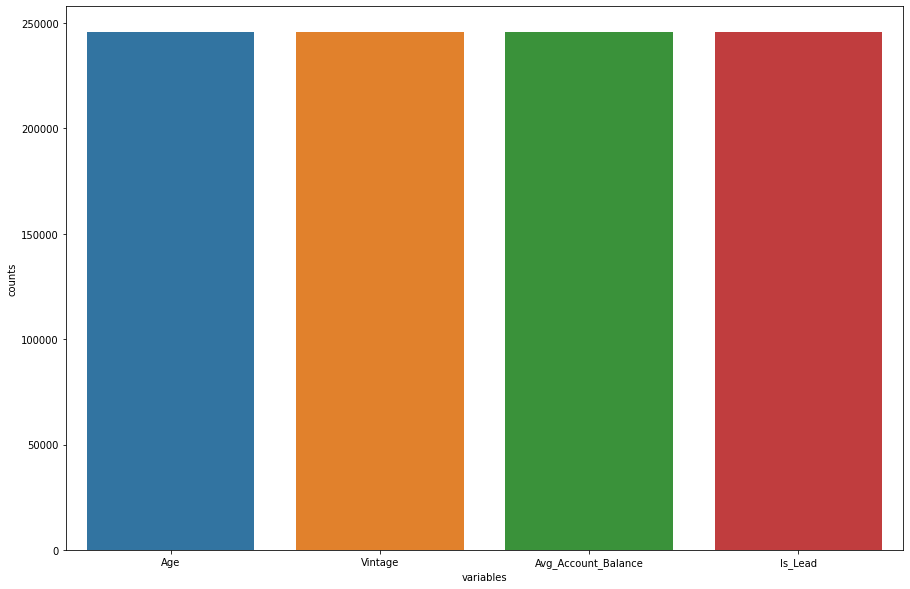

In [26]:
plt.figure(figsize=(15,10))
sns.countplot(df)
plt.xlabel('variables')
plt.ylabel('counts')

In [21]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.countplot("Gender",hue="Is_Active",data=df)
plt.subplot(1,3,2)
sns.countplot("Gender",hue="Credit_Product",data=df)
plt.subplot(1,3,3)
sns.barplot(df["Occupation"],df["Avg_Account_Balance"],ci=True)